import 

In [8]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

User Input

In [9]:
n_iter = 100000
n_data = 10000
noise_amplitude = 0.1
learning_rate = 1E-3

Generatinging Training Data

In [10]:
x = np.linspace(-pi, pi, n_data)
y = np.sin(x) + noise_amplitude*np.random.randn(n_data)

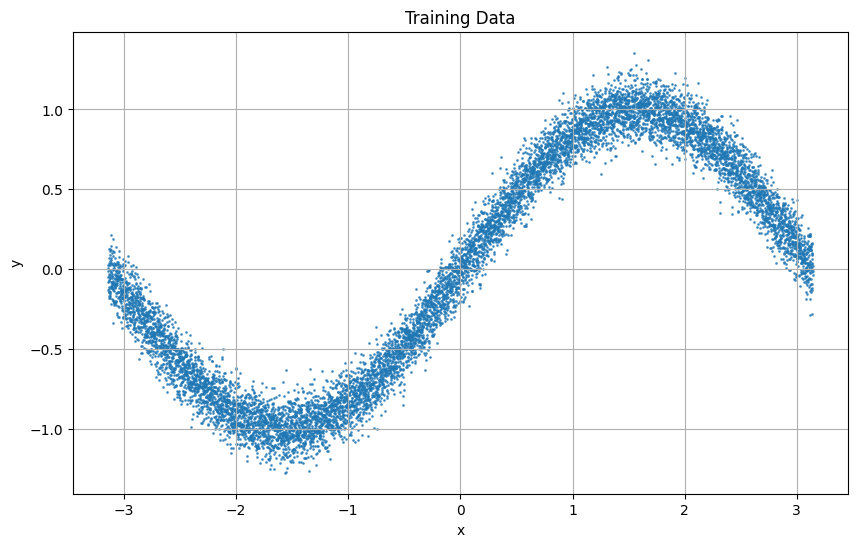

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Noisy Sine Wave', alpha=0.7, s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data')
plt.grid(True)
plt.show()

Third order regression model equations: 
$\newline
y_{\text{pred}_i} = a + bx_i + cx_i^2 + dx_i^3\newline
$

Loss Function

$
L = \frac{1}{N} \sum_{i=1}^{N} (y_{\text{pred}_i} - y_i)^2\newline
$


Gradient Calculation

$
\frac{\partial L}{\partial y_{\text{pred}}} = \frac{2}{N} \sum_{i=1}^{N} (y_{\text{pred}_i} - y_i)\newline
$

$\frac{\partial L}{\partial a} = \frac{\partial L}{\partial y_{\text{pred}}} \times \frac{\partial y_{\text{pred}}}{\partial a} = \frac{2}{N} \sum_{i=1}^{N} (y_{\text{pred}_i} - y_i)\newline
$

$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial y_{\text{pred}}} \times \frac{\partial y_{\text{pred}}}{\partial b} = \frac{2}{N} \sum_{i=1}^{N} (y_{\text{pred}_i} - y_i) \cdot x_i\newline
$

$
\frac{\partial L}{\partial c} = \frac{\partial L}{\partial y_{\text{pred}}} \times \frac{\partial y_{\text{pred}}}{\partial c} = \frac{2}{N} \sum_{i=1}^{N} (y_{\text{pred}_i} - y_i) \cdot x_i^2\newline
$

$
\frac{\partial L}{\partial d} = \frac{\partial L}{\partial y_{\text{pred}}} \times \frac{\partial y_{\text{pred}}}{\partial c} = \frac{2}{N} \sum_{i=1}^{N} (y_{\text{pred}_i} - y_i) \cdot x_i^3\newline
$

$
\text{Updateing} ~a, ~b, ~c ~\text{and} ~d\newline
a \mathrel{-}= \text{learning\_rate} \times \frac{\partial L}{\partial a}\newline
$

$
b \mathrel{-}= \text{learning\_rate} \times \frac{\partial L}{\partial b}\newline
$

$
c \mathrel{-}= \text{learning\_rate} \times \frac{\partial L}{\partial c}\newline
$

$
d \mathrel{-}= \text{learning\_rate} \times \frac{\partial L}{\partial d}\newline
$

In [12]:
class AI_Model:
    def __init__(self) -> None:
        self.model = "a+b*x+c*x**2+d*x**3"
        self.a = np.random.randn()
        self.b = np.random.randn()
        self.c = np.random.randn()
        self.d = np.random.randn()
        self.best_a = np.random.randn()
        self.best_b = np.random.randn()
        self.best_c = np.random.randn()
        self.best_d = np.random.randn()
        self.loss = float('inf')    
        self.best_loss = float('inf')

    # def update_weights(self):
    #     self.a = a
    #     self.b = b
    #     self.c = c
    #     self.d = d

    def update_best_weights(self):
        self.best_a = self.a
        self.best_b = self.b
        self.best_c = self.c
        self.best_d = self.d

    def update_best_loss(self):
        self.best_loss = self.loss

    def y_pred(self, x):
        return self.a+self.b*x+self.c*x**2+self.d*x**3
    
    def y_pred_best(self, x):
        return self.best_a + self.best_b*x + self.best_c*x**2 + self.best_d*x**3

    def get_weights(self):
        return self.a, self.b, self.c, self.d
    
    def get_best_weights(self):
        return self.best_a, self.best_b, self.best_c, self.best_d
    
    def get_model(self):
        return self.model
       

In [13]:
class plot_model:
    def __init__(self) -> None:
        self.fig, self.ax = plt.subplots(figsize=(8, 6))
        
    def plot(self, x, y_pred_best):
        self.ax.clear()
        self.ax.scatter(x, y, label='Noisy Sine Wave', alpha=0.7, s=1)
        self.ax.scatter(x, y_pred_best, label='Sine Wave From Model', color='red', alpha=0.7, s=1)
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y_pred')
        self.ax.set_title('Regression Model (3rd Order) and Training Data Plot')
        self.ax.grid(True)
        self.ax.legend()
        clear_output(wait=True)
        display(self.fig)
        # clear_output(wait=True)

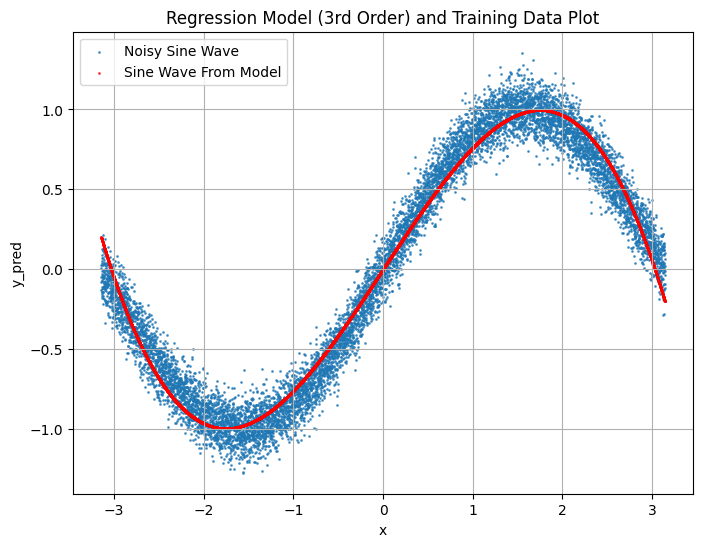


Runtime: 9.2 seconds


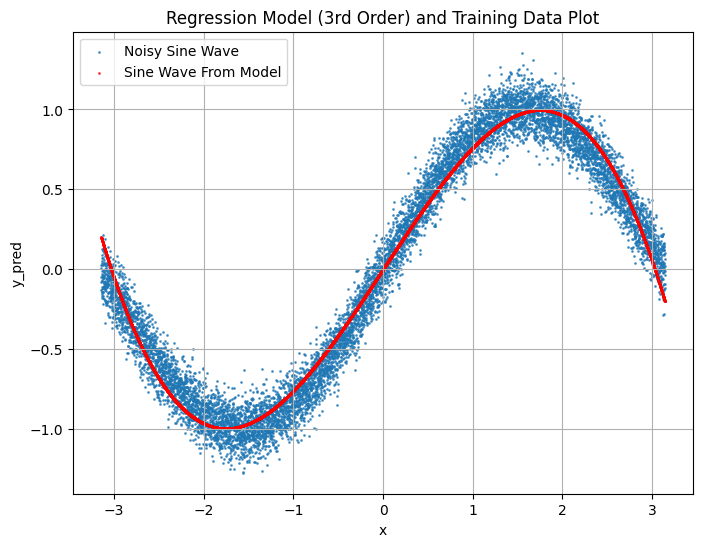

In [14]:
ai = AI_Model()
pl = plot_model()
start_time = time.time()

for i_iter in range(n_iter):
    # Forward
    y_pred = ai.y_pred(x)

    # Compute Loss
    ai.loss = np.square(y_pred - y).sum()

    # Save the weights if loss improves by 5%
    if ai.loss/ai.best_loss < 0.9999999:
        ai.update_best_loss()
        ai.update_best_weights()
        non_improving_counter = 0
    else:
        non_improving_counter += 1
        if non_improving_counter >= 10:
            print("Breaking out of the training loop.")
            break

    if i_iter % 1000 == 0:
        print(f"iteration: {i_iter} => loss: {ai.loss}")
        pl.plot(x, ai.y_pred_best(x))

    # Backprop - compute gradients weights
    delL_by_del_y_pred = 2.0*(y_pred - y)/n_data
    delL_by_del_a = delL_by_del_y_pred.sum()
    delL_by_del_b = (delL_by_del_y_pred * x).sum()
    delL_by_del_c = (delL_by_del_y_pred * x ** 2).sum()
    delL_by_del_d = (delL_by_del_y_pred * x ** 3).sum()

    # Update weights
    ai.a -= learning_rate * delL_by_del_a
    ai.b -= learning_rate * delL_by_del_b
    ai.c -= learning_rate * delL_by_del_c
    ai.d -= learning_rate * delL_by_del_d
    # ai.update_weights()

pl.plot(x, ai.y_pred_best(x))

end_time = time.time()
runtime_seconds = end_time - start_time
print(f"\nRuntime: {round(runtime_seconds, 1)} seconds")